# Capstone Project - Customer Churn Prediction

Project Pipeline:

1) Problem Defination >>>>>>
2) Data Collection >>>>>>
3) Exploratory Data Analysis >>>>>>
4) Featuring Engineering >>>>>>
5) Train Test Split >>>>>>>
6) Define & Fit Model >>>>>>
7) Model Evaluation >>>>>>
8) Model Optimization >>>>>
9) Model Deployment !!!

## 1) Problem Definition

Develop model to predict if customer is churn (Leaving the service / terminating thier telco contract).

Identify features which lead customer to churn.

## 2) Data Collection

The data set is collect from kaggle

Source: (https://www.kaggle.com/blastchar/telco-customer-churn)

File name: Telco-Customer-Churn.csv

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content** 

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration


In [2]:
# Import package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import plotly.express as px
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
 
    
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier


from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


import xgboost as xgb
from xgboost import XGBClassifier


from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint


# Avoid some version change warning
import warnings
warnings.filterwarnings("ignore")


### Load Data

In [7]:
# Import data

df = pd.read_csv('../2. Data/Telco-Customer-Churn.csv')

## 3) Exploratory Data Analysis 

### Data Profiling

In [8]:
# Display data in pandas 

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
# Check dataset shape (number of row & columns)

df.shape

(7043, 21)

In [5]:
# List dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# List all columns

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Check for null value

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Counting the number of missing values.

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Check for Domains & Intervals

print('- Domains, Intervals\n')
for c in df.columns:
    x = df[c].unique()
    x.sort()
    print('+ %-27s: (%-s)' % (c, df[c].dtypes.name))

    if df[c].dtypes.name != 'object':
        print('  min: %d, max: %d' % (df[c].min(), df[c].max()))
    print('  values: %s\n' % x)

- Domains, Intervals

+ customerID                 : (object)
  values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

+ gender                     : (object)
  values: ['Female' 'Male']

+ SeniorCitizen              : (int64)
  min: 0, max: 1
  values: [0 1]

+ Partner                    : (object)
  values: ['No' 'Yes']

+ Dependents                 : (object)
  values: ['No' 'Yes']

+ tenure                     : (int64)
  min: 0, max: 72
  values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]

+ PhoneService               : (object)
  values: ['No' 'Yes']

+ MultipleLines              : (object)
  values: ['No' 'No phone service' 'Yes']

+ InternetService            : (object)
  values: ['DSL' 'Fiber optic' 'No']

+ OnlineSecurity             : (object)
  values: ['No'

In [10]:
# Check unique in simplfied format

def print_unique_value(df):
    for column in df:
#         if df[column].dtype == 'object':
            print(f'{column}: {df[column].unique()}')

print_unique_value(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [11]:
# Check for continuous features statistic

df.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [12]:
# Check churn values

df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Data Cleaning

In [13]:
# Drop the rows with missing values.

df = df.dropna()

In [14]:
# Consolidating wording with same meaning

df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [15]:
# Change data type from object to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [16]:
# Re inspect the data type

df['TotalCharges'].dtypes

dtype('float64')

In [17]:
# Rename "PaymentMethod" column to presentable format

Payment_Method = {'Electronic check': 'E-Check' , 
                  'Mailed check': 'Mailed Check', 
                  'Bank transfer (automatic)': 'Bank Transfer', 
                  'Credit card (automatic)': 'Credit Card'}

df["PaymentMethod"].replace(Payment_Method, inplace=True)

### Data Exploration

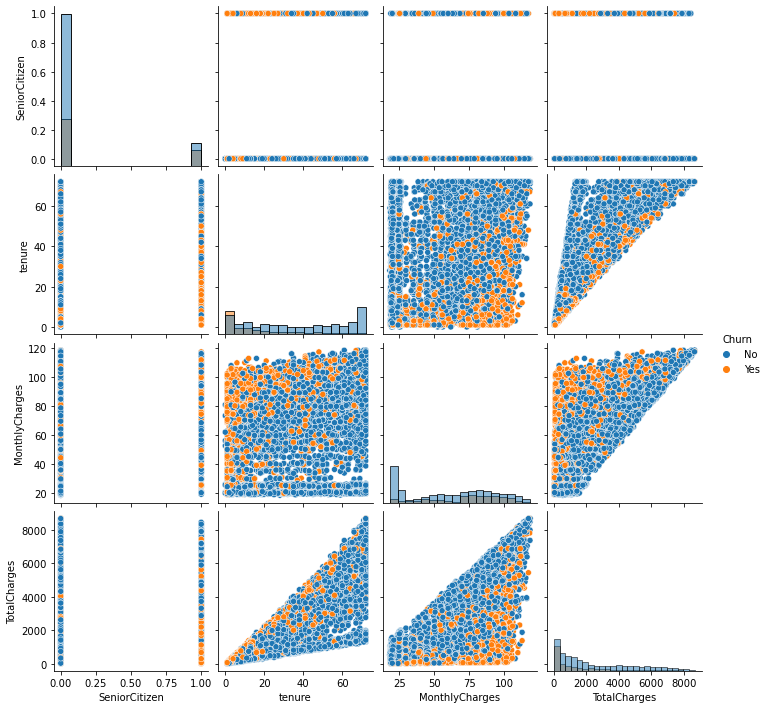

In [18]:
sns.pairplot(df, hue="Churn", diag_kind="hist")

In [19]:
df.corr = df.corr()

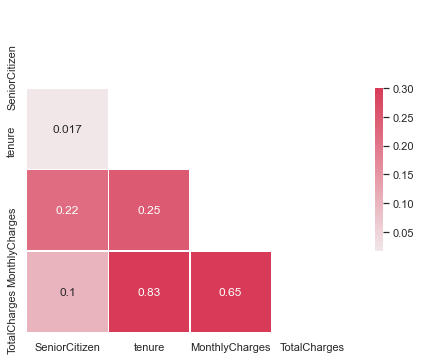

In [20]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(8, 6, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [21]:
churn_pie = df["Churn"].value_counts().to_frame()
churn_pie  = churn_pie .reset_index()
churn_pie  = churn_pie .rename(columns={'index': 'Category'})
fig = px.pie(churn_pie , values='Churn', names='Category', color_discrete_sequence=["skyblue", "blue"],
             title='Distribution of Churn')
fig.show()

Text(0.5, 1.0, 'Class Distribution')

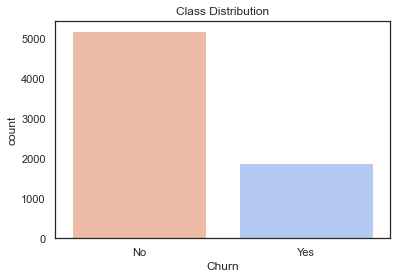

In [22]:
sns.countplot(x='Churn',data=df,palette="coolwarm_r").set_title('Class Distribution')

In [23]:
# Defining bar chart function

def bar(feature, df=df ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["skyblue", "blue"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='center',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.0,
                y=1.1,
                bordercolor='black',
                borderwidth=3)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=300),
    )
     
    return fig.show()

In [24]:
# Gender feature plot

bar('gender')

In [25]:
# SeniorCitizen feature plot 

df.loc[df.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
df.loc[df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #convert 1 to Yes in all data instances
bar('SeniorCitizen')


In [26]:
# Partner feature plot

bar('Partner')

In [27]:
# Dependents feature plot

bar('Dependents')

In [28]:
bar('PhoneService')

In [29]:
bar('MultipleLines')

In [30]:
bar('InternetService')

In [31]:
bar('OnlineSecurity')

In [32]:
bar('OnlineBackup')

In [33]:
bar('DeviceProtection')

In [34]:
bar('TechSupport')

In [35]:
bar('StreamingTV')

In [36]:
bar('StreamingMovies')

In [37]:
bar('Contract')

In [38]:
bar('PaperlessBilling')

In [39]:
bar('PaymentMethod')

In [40]:
# Defining the histogram plotting function

def hist(feature):
    group_df = df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["skyblue", "blue"])
    fig.show()

In [41]:
hist('tenure')

In [42]:
hist('MonthlyCharges')

In [43]:
hist('TotalCharges')

In [44]:
# Check of outliers in numerical features by applying the IQR method checking if values are way outside the IQR borders.

numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [45]:
# Scatter plot combining 3 features (Tenure, Montly Charges & Contract Type)

fig = px.scatter(x=df['tenure'], y=df['MonthlyCharges'], 
                 color = df['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = df['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'MonthlyCharges $'})
                
fig.show()

In [46]:
# Scatter plot combining 3 features (Tenure, Total Charges & Contract Type)

fig = px.scatter(x=df['tenure'], y=df['TotalCharges'], 
                 color = df['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = df['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
                
fig.show()

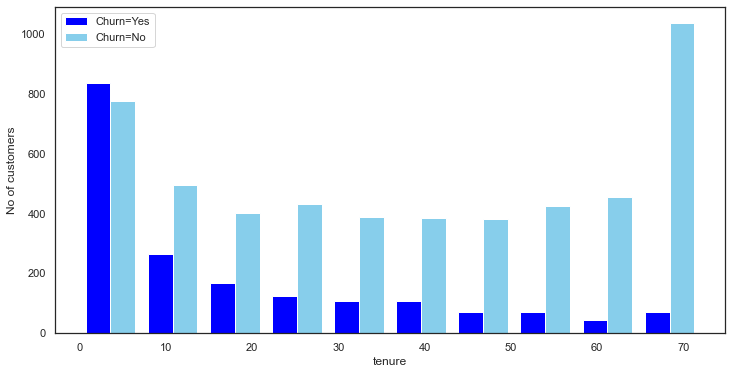

In [47]:
# Features Visualisation for "tenure" with "Churn" count

tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure
fig = plt.figure(figsize=(12,6))
plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.hist([tenure_churn_yes, tenure_churn_no], color=['blue','skyblue'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

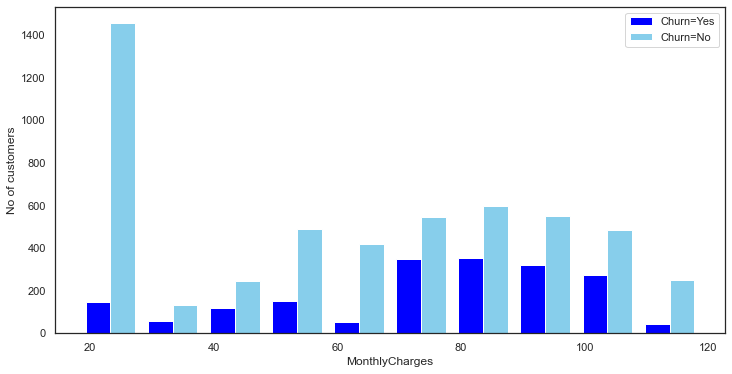

In [48]:
# Features Visualisation for "MonthlyCharges" with "Churn" count

monthly_charges_churn_no = df[df.Churn == 'No'].MonthlyCharges
monthly_charges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
fig = plt.figure(figsize=(12,6))
plt.xlabel('MonthlyCharges')
plt.ylabel('No of customers')
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['blue','skyblue'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

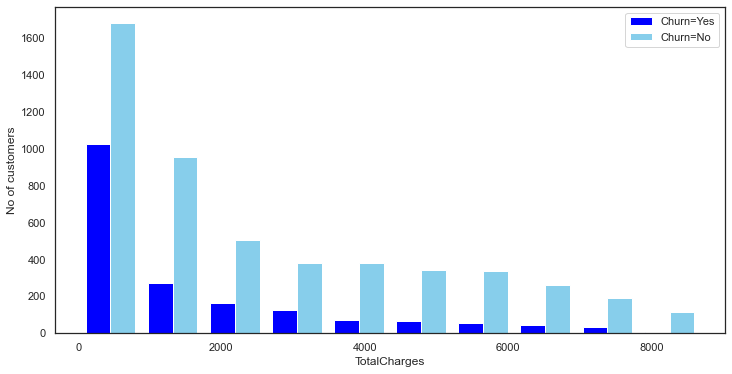

In [49]:
# Features Visualisation for "TotalCharges" with "Churn" count

monthly_charges_churn_no = df[df.Churn == 'No'].TotalCharges
monthly_charges_churn_yes = df[df.Churn == 'Yes'].TotalCharges
fig = plt.figure(figsize=(12,6))
plt.xlabel('TotalCharges')
plt.ylabel('No of customers')
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['blue','skyblue'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

## 4) Featuring Engineering

In [50]:
df

customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male            No     Yes        Yes      24   
7039  2234-XADUH  Female            No     Yes        Yes      72   
7040  4801-JZAZL  Female            No     Yes        Yes      11   
7041  8361-LTMKD    Male           Yes     Yes         No       4   
7042  3186-AJIEK    Male            No      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0              No            No             DSL             No  ...   
1             Yes            No             DSL            Yes  ...   
2             Yes            No             DSL            Yes  ...   
3              No            No             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
7038          Yes           Yes             DSL            Yes  ...   
7039          Yes           Yes     Fiber optic             No  ...   
7040           No            No             DSL            Yes  ...   
7041          Yes           Yes     Fiber optic             No  ...   
7042          Yes            No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling  PaymentMethod MonthlyCharges  TotalCharges  Churn  
0                 Yes        E-Check          29.85         29.85     No  
1                  No   Mailed Check          56.95       1889.50     No  
2                 Yes   Mailed Check          53.85        108.15    Yes  
3                  No  Bank Transfer          42.30       1840.75     No  
4                 Yes        E-Check          70.70        151.65    Yes  
...               ...            ...            ...           ...    ...  
7038              Yes   Mailed Check          84.80       1990.50     No  
7039              Yes    Credit Card         103.20       7362.90     No  
7040              Yes        E-Check          29.60        346.45     No  
7041              Yes   Mailed Check          74.40        306.60    Yes  
7042              Yes  Bank Transfer         105.65       6844.50     No  

[7043 rows x 21 columns]

In [51]:
# Data subset: Remove customer ID from data frame

df = df.drop(columns=['customerID'])

In [52]:
# Create a function to generate countplots:

def countplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

In [53]:
# Generate new feature "Number_AdditionalServices" by summing up the number of add-on services consumed.

df_aos = df.copy(deep=True)

df_aos['Add_On_Services'] = (df_aos[['OnlineSecurity', 
                                       'DeviceProtection', 
                                       'StreamingMovies', 
                                       'TechSupport', 
                                       'StreamingTV',
                                       'OnlineBackup']] =='Yes').sum(axis=1)

In [54]:
# Create a function to generate boxplots.

plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}


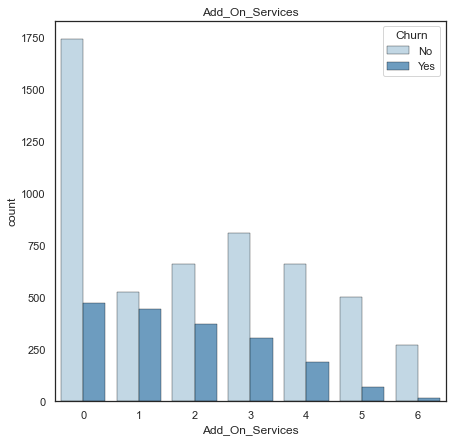

In [55]:
# Generate countplot for the new feature.

countplot('Churn', ['Add_On_Services'], df_aos)

In [56]:
# Check columns with two classes

columns = df.columns
binary_columns = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_columns.append(col)
        
 
print('Number of columns with 2 class =',len(binary_columns))
binary_columns

Number of columns with 2 class = 14


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [57]:
# Check columns with multiple classes

columns = df.columns
multiple_class_columns = []

for col in columns:
    if df[col].value_counts().shape[0] != 2:
        multiple_class_columns.append(col)
        
 
print('Number of columns with multiple classes =',len(multiple_class_columns))
multiple_class_columns

Number of columns with multiple classes = 6


['tenure',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

### Label Encoding

In [58]:
# Convert Yes & No to 1 & 0

for column in binary_columns:
    df[column].replace({'Yes':1, 'No':0}, inplace=True)

In [59]:
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female              0        1           0       1             0   
1       Male              0        0           0      34             1   
2       Male              0        0           0       2             1   
3       Male              0        0           0      45             0   
4     Female              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038    Male              0        1           1      24             1   
7039  Female              0        1           1      72             1   
7040  Female              0        1           1      11             0   
7041    Male              1        1           0       4             1   
7042    Male              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL               0             1   
1                 0             DSL               1             0   
2                 0             DSL               1             1   
3                 0             DSL               1             0   
4                 0     Fiber optic               0             0   
...             ...             ...             ...           ...   
7038              1             DSL               1             0   
7039              1     Fiber optic               0             1   
7040              0             DSL               1             0   
7041              1     Fiber optic               0             0   
7042              0     Fiber optic               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7038                 1            1            1                1   
7039                 1            0            1                1   
7040                 0            0            0                0   
7041                 0            0            0                0   
7042                 1            1            1                1   

            Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0     Month-to-month                 1        E-Check           29.85   
1           One year                 0   Mailed Check           56.95   
2     Month-to-month                 1   Mailed Check           53.85   
3           One year                 0  Bank Transfer           42.30   
4     Month-to-month                 1        E-Check           70.70   
...              ...               ...            ...             ...   
7038        One year                 1   Mailed Check           84.80   
7039        One year                 1    Credit Card          103.20   
7040  Month-to-month                 1        E-Check           29.60   
7041  Month-to-month                 1   Mailed Check           74.40   
7042        Two year                 1  Bank Transfer          105.65   

      TotalCharges  Churn  
0            29.85      0  
1          1889.50      0  
2           108.15      1  
3          1840.75      0  
4           151.65      1  
...            ...    ...  
7038       1990.50      0  
7039       7362.90      0  
7040        346.45      0  
7041        306.60      1  
7042       6844.50      0  

[7043 rows x 20 columns]

In [60]:
# Label Male & Female to 1 & 0

df.gender.replace({'Male':1, 'Female':0}, inplace=True)

In [61]:
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL               0             1   
1                 0             DSL               1             0   
2                 0             DSL               1             1   
3                 0             DSL               1             0   
4                 0     Fiber optic               0             0   
...             ...             ...             ...           ...   
7038              1             DSL               1             0   
7039              1     Fiber optic               0             1   
7040              0             DSL               1             0   
7041              1     Fiber optic               0             0   
7042              0     Fiber optic               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7038                 1            1            1                1   
7039                 1            0            1                1   
7040                 0            0            0                0   
7041                 0            0            0                0   
7042                 1            1            1                1   

            Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0     Month-to-month                 1        E-Check           29.85   
1           One year                 0   Mailed Check           56.95   
2     Month-to-month                 1   Mailed Check           53.85   
3           One year                 0  Bank Transfer           42.30   
4     Month-to-month                 1        E-Check           70.70   
...              ...               ...            ...             ...   
7038        One year                 1   Mailed Check           84.80   
7039        One year                 1    Credit Card          103.20   
7040  Month-to-month                 1        E-Check           29.60   
7041  Month-to-month                 1   Mailed Check           74.40   
7042        Two year                 1  Bank Transfer          105.65   

      TotalCharges  Churn  
0            29.85      0  
1          1889.50      0  
2           108.15      1  
3          1840.75      0  
4           151.65      1  
...            ...    ...  
7038       1990.50      0  
7039       7362.90      0  
7040        346.45      0  
7041        306.60      1  
7042       6844.50      0  

[7043 rows x 20 columns]

In [62]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [63]:
df.shape

(7043, 20)

In [64]:
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL               0             1   
1                 0             DSL               1             0   
2                 0             DSL               1             1   
3                 0             DSL               1             0   
4                 0     Fiber optic               0             0   
...             ...             ...             ...           ...   
7038              1             DSL               1             0   
7039              1     Fiber optic               0             1   
7040              0             DSL               1             0   
7041              1     Fiber optic               0             0   
7042              0     Fiber optic               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7038                 1            1            1                1   
7039                 1            0            1                1   
7040                 0            0            0                0   
7041                 0            0            0                0   
7042                 1            1            1                1   

            Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0     Month-to-month                 1        E-Check           29.85   
1           One year                 0   Mailed Check           56.95   
2     Month-to-month                 1   Mailed Check           53.85   
3           One year                 0  Bank Transfer           42.30   
4     Month-to-month                 1        E-Check           70.70   
...              ...               ...            ...             ...   
7038        One year                 1   Mailed Check           84.80   
7039        One year                 1    Credit Card          103.20   
7040  Month-to-month                 1        E-Check           29.60   
7041  Month-to-month                 1   Mailed Check           74.40   
7042        Two year                 1  Bank Transfer          105.65   

      TotalCharges  Churn  
0            29.85      0  
1          1889.50      0  
2           108.15      1  
3          1840.75      0  
4           151.65      1  
...            ...    ...  
7038       1990.50      0  
7039       7362.90      0  
7040        346.45      0  
7041        306.60      1  
7042       6844.50      0  

[7043 rows x 20 columns]

### One Hot Encoding

In [65]:
# Creating dummy columns for features with multiple classes and non continuos datapoint

df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [66]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank Transfer',
       'PaymentMethod_Credit Card', 'PaymentMethod_E-Check',
       'PaymentMethod_Mailed Check'],
      dtype='object')

In [67]:
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                       1                            0                   0   
1                       1                            0                   0   
2                       1                            0                   0   
3                       1                            0                   0   
4                       0                            1                   0   
...                   ...                          ...                 ...   
7038                    1                            0                   0   
7039                    0                            1                   0   
7040                    1                            0                   0   
7041                    0                            1                   0   
7042                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7038                        0                  1                  0   
7039                        0                  1                  0   
7040                        1                  0                  0   
7041                        1                  0                  0   
7042                        0                  0                  1   

      PaymentMethod_Bank Transfer  PaymentMethod_Credit Card  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               1                          0   
4                               0                          0   
...                           

In [68]:
# Rename column to presentable format

df = df.rename({'gender': 'Gender',
                'tenure': 'Tenure',
                'InternetService_DSL': 'IntService_DSL', 
                'InternetService_Fiber optic': 'IntService_Fiber', 
                'InternetService_No': 'IntService_No',
                'Contract_Month-to-month': 'Contract_Mth', 
                'Contract_One year': 'Contract_1Y', 
                'Contract_Two year': 'Contract_2Y',
                'PaymentMethod_Bank Transfer': 'PayMethod_Bank', 
                'PaymentMethod_Credit Card': 'PayMethod_C_Card', 
                'PaymentMethod_E-Check': 'PayMethod_Electonic', 
                'PaymentMethod_Mailed Check': 'PayMethod_Mail'}, axis=1)

In [69]:
df

Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      IntService_DSL  IntService_Fiber  IntService_No  Contract_Mth  \
0                  1                 0              0             1   
1                  1                 0              0             0   
2                  1                 0              0             1   
3                  1                 0              0             0   
4                  0                 1              0             1   
...              ...               ...            ...           ...   
7038               1                 0              0             0   
7039               0                 1              0             0   
7040               1                 0              0             1   
7041               0                 1              0             1   
7042               0                 1              0             0   

      Contract_1Y  Contract_2Y  PayMethod_Bank  PayMethod_C_Card  \
0               0            0               0                 0   
1               1            0               0                 0   
2               0            0               0                 0   
3               1            0               1                 0   
4               0            0               0                 0   
...           ...          ...             ...               ...   
7038            1            0               0                 0   
7039            1            0               0                 1   
7040            0            0               0                 0   
7041            0            0               0                 0   
7042            0            1               1                 0   

      PayMethod_Electonic  PayMethod_Mail  
0                       1               0  
1                       0               1  
2                       0               1  
3                       0               0  
4                       1               0  
...                   ...             ...  
7038                    0               1  
7039                    0               0  
7040                    1               0  
7041                    0               1  
7042                    0               0  

[7043

In [70]:
# Relocate "Churn" column to last row

df= df[ [ col for col in df.columns if col != 'Churn' ] + ['Churn']]

In [71]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'IntService_DSL',
       'IntService_Fiber', 'IntService_No', 'Contract_Mth', 'Contract_1Y',
       'Contract_2Y', 'PayMethod_Bank', 'PayMethod_C_Card',
       'PayMethod_Electonic', 'PayMethod_Mail', 'Churn'],
      dtype='object')

In [72]:
# Re-inspect datapoint

df.head()

Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   IntService_Fiber  IntService_No  Contract_Mth  Contract_1Y  Contract_2Y  \
0                 0              0             1            0            0   
1                 0              0             0            1            0   
2                 0              0             1            0            0   
3                 0              0             0            1            0   
4                 1              0             1            0            0   

   PayMethod_Bank  PayMethod_C_Card  PayMethod_Electonic  PayMethod_Mail  \
0               0                 0                    1               0   
1               0                 0                    0               1   
2               0                 0                    0               1   
3               1                 0                    0               0   
4               0                 0                    1               0   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  

[5 rows x 27 columns]

In [73]:
# Check new data frame size

df.shape

(7043, 27)

In [74]:
# Check new data columns

df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'IntService_DSL',
       'IntService_Fiber', 'IntService_No', 'Contract_Mth', 'Contract_1Y',
       'Contract_2Y', 'PayMethod_Bank', 'PayMethod_C_Card',
       'PayMethod_Electonic', 'PayMethod_Mail', 'Churn'],
      dtype='object')

In [75]:
columns = df.columns

for col in columns:
   df[columns] = df[columns].astype(float)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               7043 non-null   float64
 1   SeniorCitizen        7043 non-null   float64
 2   Partner              7043 non-null   float64
 3   Dependents           7043 non-null   float64
 4   Tenure               7043 non-null   float64
 5   PhoneService         7043 non-null   float64
 6   MultipleLines        7043 non-null   float64
 7   OnlineSecurity       7043 non-null   float64
 8   OnlineBackup         7043 non-null   float64
 9   DeviceProtection     7043 non-null   float64
 10  TechSupport          7043 non-null   float64
 11  StreamingTV          7043 non-null   float64
 12  StreamingMovies      7043 non-null   float64
 13  PaperlessBilling     7043 non-null   float64
 14  MonthlyCharges       7043 non-null   float64
 15  TotalCharges         7032 non-null   f

### Data Imputation

In [77]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute

values = df.values

# define the criteria for dealing with the missing values

imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'median'
)
# Now impute it

imputedData = imputer.fit_transform(values)

In [78]:
# Check data 

imputedData[:3] 

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.9850e+01,
        2.9850e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4000e+01,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.6950e+01,
        1.8895e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.3850e+01,
        1.0815e+02, 1.0000e+00, 0.0000e+00, 0.0000

### Feature Scaling & Normalization

In [79]:
# Scale data betwen 0 & 1 and normalisaiton

scaler = MinMaxScaler(feature_range = (0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [80]:
# Check data

normalizedData[:3]

array([[0.        , 0.        , 1.        , 0.        , 0.01388889,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.11542289,
        0.0012751 , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.47222222,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.38507463,
        0.21586661, 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.02777778,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.35422886,
        0.01031041, 1.        , 0.        , 0.    

In [81]:
# Move the data back to a dataframe

df_n = pd.DataFrame.from_records(normalizedData, columns = df.columns)
df_n['Churn'] = df_n['Churn'].astype(np.int8)
df_n.sample(5)

Gender  SeniorCitizen  Partner  Dependents    Tenure  PhoneService  \
5183     0.0            1.0      1.0         1.0  0.472222           1.0   
1593     1.0            0.0      1.0         1.0  0.055556           1.0   
6891     0.0            0.0      1.0         0.0  0.055556           0.0   
1107     0.0            0.0      1.0         0.0  0.958333           1.0   
492      0.0            0.0      1.0         0.0  0.027778           1.0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
5183            1.0             0.0           1.0               0.0  ...   
1593            0.0             0.0           0.0               0.0  ...   
6891            0.0             1.0           0.0               0.0  ...   
1107            1.0             0.0           0.0               0.0  ...   
492             0.0             1.0           0.0               0.0  ...   

      IntService_Fiber  IntService_No  Contract_Mth  Contract_1Y  Contract_2Y  \
5183               1.0            0.0           1.0          0.0          0.0   
1593               0.0            1.0           1.0          0.0          0.0   
6891               0.0            0.0           1.0          0.0          0.0   
1107               0.0            1.0           0.0          0.0          1.0   
492                1.0            0.0           1.0          0.0          0.0   

      PayMethod_Bank  PayMethod_C_Card  PayMethod_Electonic  PayMethod_Mail  \
5183             0.0               0.0                  0.0             1.0   
1593             0.0               0.0                  0.0             1.0   
6891             0.0               0.0                  1.0             0.0   
1107             1.0               0.0                  0.0             0.0   
492              0.0               0.0                  1.0             0.0   

      Churn  
5183      1  
1593      0  
6891      0  
1107      0  
492       1  

[5 rows x 27 columns]

In [82]:
df_n.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'IntService_DSL',
       'IntService_Fiber', 'IntService_No', 'Contract_Mth', 'Contract_1Y',
       'Contract_2Y', 'PayMethod_Bank', 'PayMethod_C_Card',
       'PayMethod_Electonic', 'PayMethod_Mail', 'Churn'],
      dtype='object')

In [83]:
# Correlation

df_n_corr = df_n.corr()

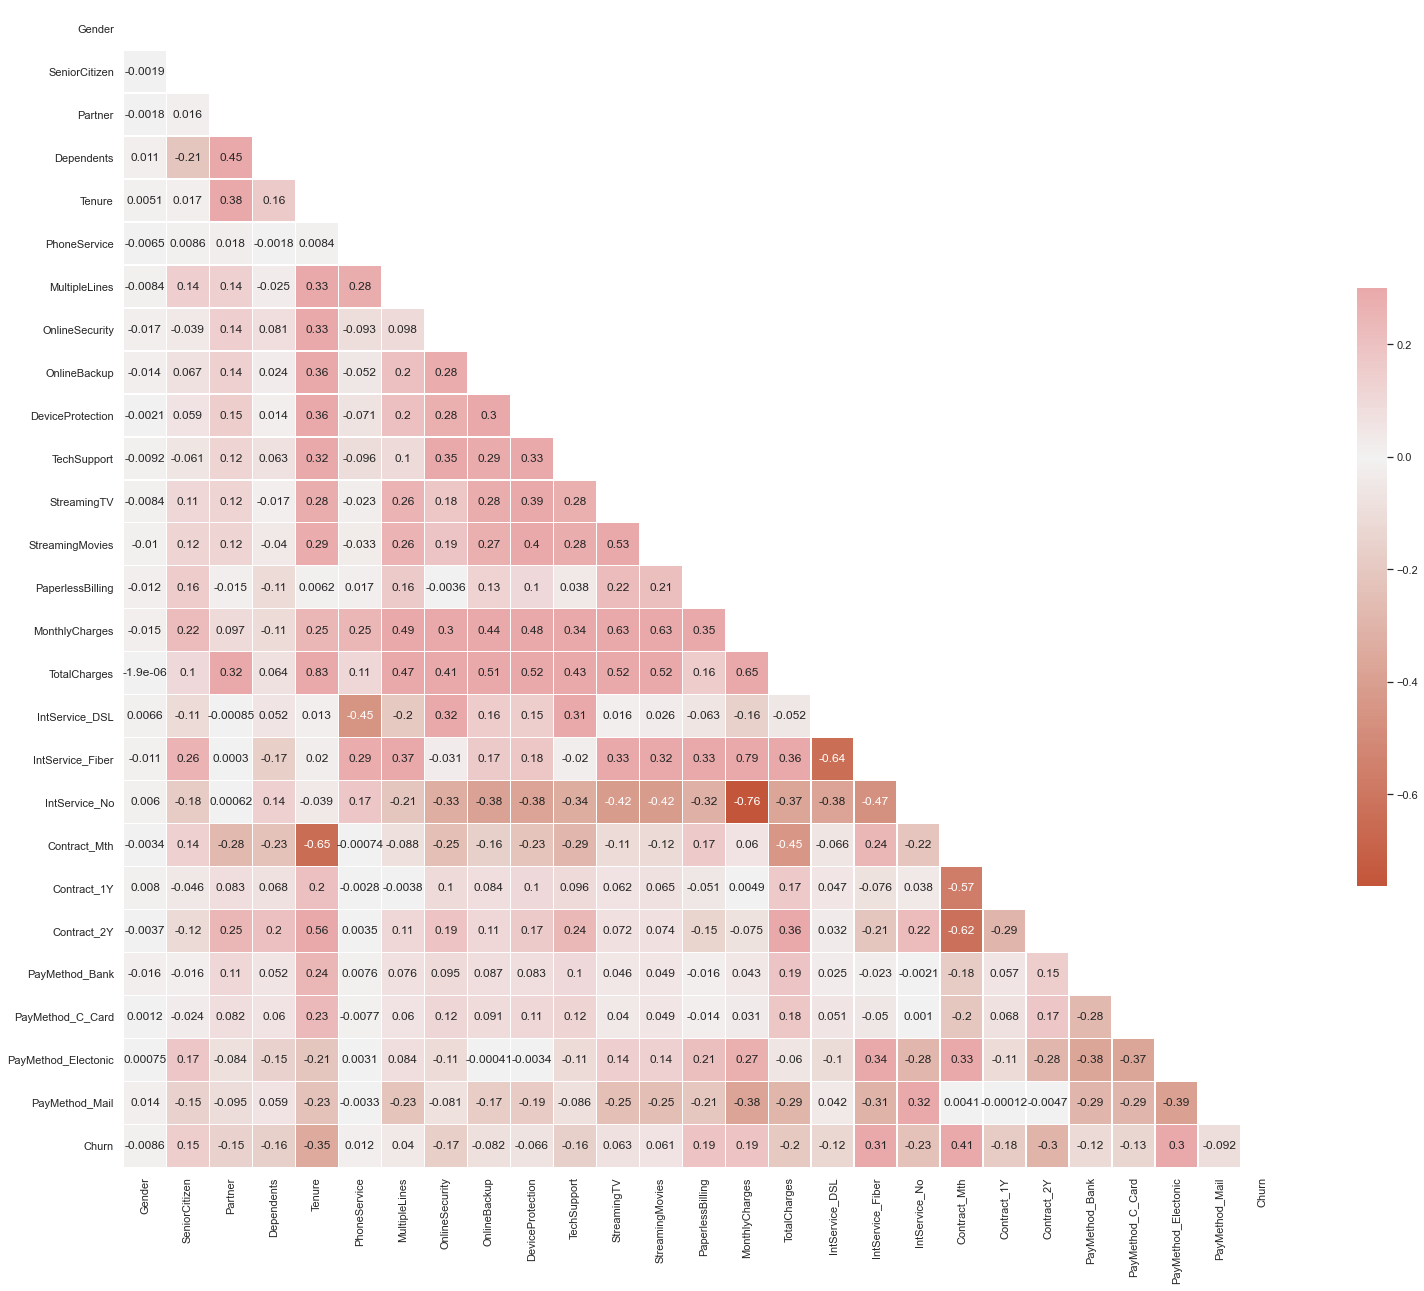

In [84]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_n_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(26, 22))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 12, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_n_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

<AxesSubplot:>

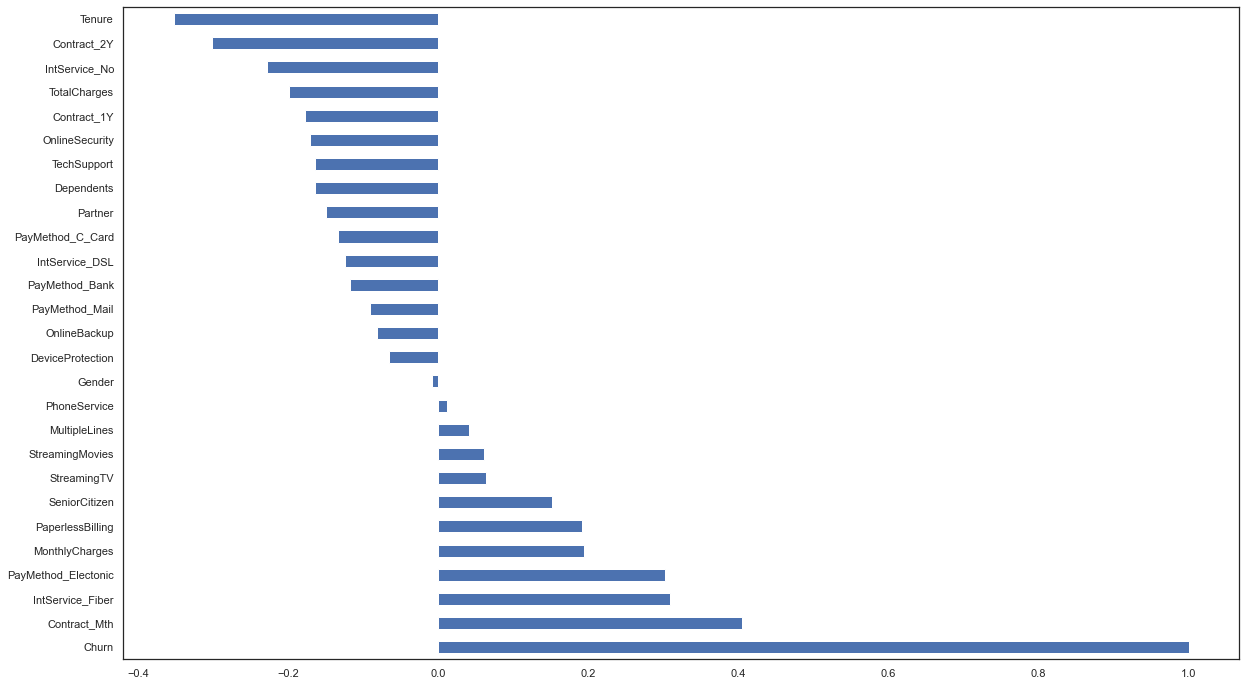

In [85]:
# Show correlation plot for correlation of Churn with each of the remaining features.

plt.figure(figsize=(16,10))
df_n.corr()['Churn'].sort_values(ascending=False).plot(kind='barh', figsize=(20,12))

In [86]:
# create X and y to match Scikit-Learn parlance

# X include all the features
X = df_n.drop(columns=['Churn'])

# y is the target variable
y = df_n['Churn']

In [87]:
X.head(5)

Gender  SeniorCitizen  Partner  Dependents    Tenure  PhoneService  \
0     0.0            0.0      1.0         0.0  0.013889           0.0   
1     1.0            0.0      0.0         0.0  0.472222           1.0   
2     1.0            0.0      0.0         0.0  0.027778           1.0   
3     1.0            0.0      0.0         0.0  0.625000           0.0   
4     0.0            0.0      0.0         0.0  0.027778           1.0   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0            0.0             0.0           1.0               0.0  ...   
1            0.0             1.0           0.0               1.0  ...   
2            0.0             1.0           1.0               0.0  ...   
3            0.0             1.0           0.0               1.0  ...   
4            0.0             0.0           0.0               0.0  ...   

   IntService_DSL  IntService_Fiber  IntService_No  Contract_Mth  Contract_1Y  \
0             1.0               0.0            0.0           1.0          0.0   
1             1.0               0.0            0.0           0.0          1.0   
2             1.0               0.0            0.0           1.0          0.0   
3             1.0               0.0            0.0           0.0          1.0   
4             0.0               1.0            0.0           1.0          0.0   

   Contract_2Y  PayMethod_Bank  PayMethod_C_Card  PayMethod_Electonic  \
0          0.0             0.0               0.0                  1.0   
1          0.0             0.0               0.0                  0.0   
2          0.0             0.0               0.0                  0.0   
3          0.0             1.0               0.0                  0.0   
4          0.0             0.0               0.0                  1.0   

   PayMethod_Mail  
0             0.0  
1             1.0  
2             1.0  
3             0.0  
4             0.0  

[5 rows x 26 columns]

In [88]:
X.shape

(7043, 26)

In [89]:
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

In [90]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## 5) Train Test Split

In [91]:
## Create training and testing subsets

test_size = 0.3

# X = df.iloc[:,:-1] #omit the last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 55, stratify = y)

# # Apply imputer and scalar pipeline to each of X_train and X_test separately
# pipeline = Pipeline([('imputer', imputer), ('scaler', MinMaxScaler())])

# # Pipeline is fit to X_train, then applied to both X_train and X_test
# X_train = pipeline.fit_transform(X_train)
# X_test = pipeline.transform(X_test) 

In [92]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (4930, 26)
X_test shape : (2113, 26)
y_train shape : (4930,)
y_test shape : (2113,)


## 6) Define & Fit Models

### Logistic Regression

In [93]:
# Instanciate and train the logistic regression model based on the training set.

logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [94]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_logr = logr.predict(X_test)
y_pred_logr_prob = logr.predict_proba(X_test)

### Support Vector Machine

In [95]:
# Instanciate and train the SVM model on the training set.

svm = SVC(kernel='rbf', probability=True) 
svm.fit(X_train,y_train)

SVC(probability=True)

In [96]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_svm = svm.predict(X_test)
y_pred_svm_prob = svm.predict_proba(X_test)

### K Nearest Neighbors

In [97]:
# Instanciate and train the KNN classifier based on the training set.

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
# Make predictions (classes and probabilities) with the trained classifier on the test set.

y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

### Random Forest

In [99]:
# Instanciate and train the random forest model based on the training set.

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

### Neural Network

In [101]:
# Instanciate NN, build up layer structure and compile model

nn = Sequential()
Input_Shape = X_train.shape[1]

nn.add(layers.Dense(1024, input_shape=(Input_Shape,), activation='relu'))
nn.add(Dropout(0.2)) 
nn.add(layers.Dense(1024, activation='relu'))
nn.add(Dropout(0.2)) 
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

# Set callback to store model with best validation accuracy during training.
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# Train model and store best performing version
fit_nn = nn.fit(X_train, y_train,
          epochs=100,
          verbose=False,
          validation_data=(X_test, y_test),
          batch_size=30, callbacks=[mc])

best_nn = load_model('best_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              27648     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,078,273
Trainable params: 1,078,273
Non-trainable params: 0
_________________________________________________________________


In [102]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_nn = best_nn.predict(X_test)
# y_pred_nn_prob = best_nn.predict_proba(X_test)
y_pred_nn_classes = (best_nn.predict(X_test) > 0.5).astype("int32")


# Reduce to 1d array.
y_pred_nn_prob_1 = y_pred_nn[:,0]
y_pred_nn_classes_1 = y_pred_nn_classes[:,0]

## 7) Model Evaluation 

### Model Evaluation Metrics

In [103]:
# Define a function that plots the feature weights for a classifier.

def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

In [104]:
# Define a function with Accuracy. Precision, Recall, ROC-AUC, Confusion Matrix

def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)
    f1_ = f1_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('F1 Score : %.4f [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0' % f1_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, f1_, precision_, recall_, roc_auc_)

### Model Evaluation

#### Logistic Regression

Accuracy : 0.7996 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5835 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6504 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5291 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7132                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


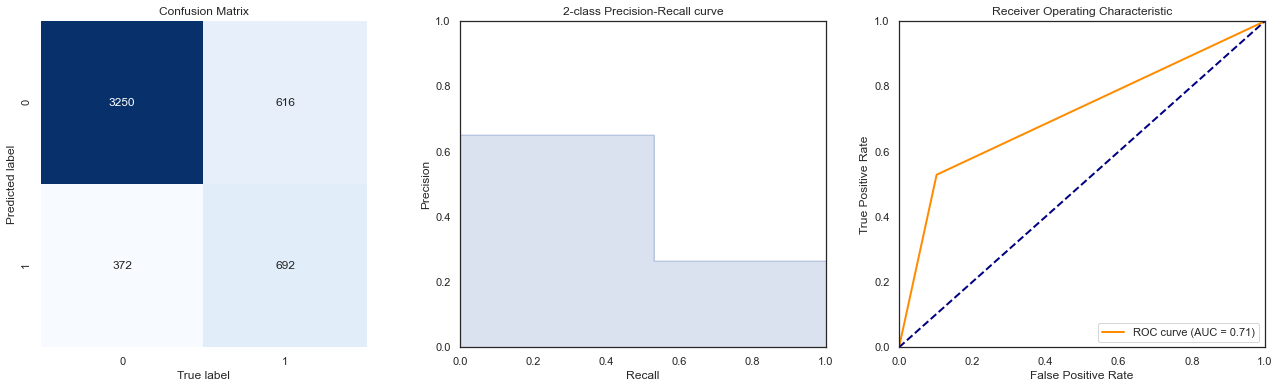

In [105]:
model = logr

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_train)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

Accuracy : 0.8116 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.6090 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6783 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5526 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7289                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


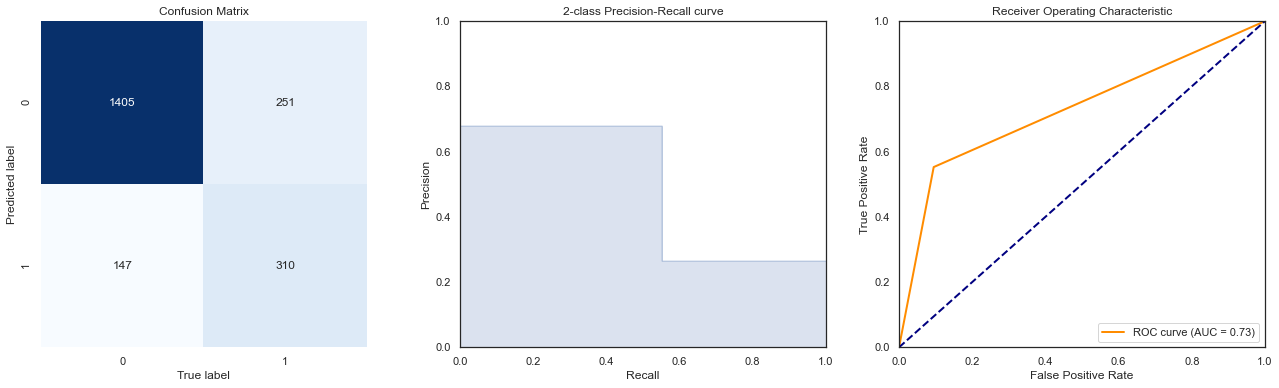

In [106]:
model = logr

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

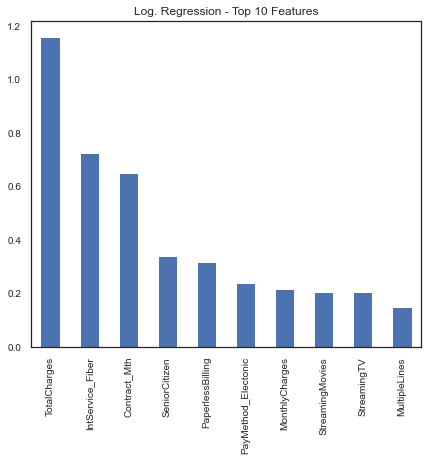

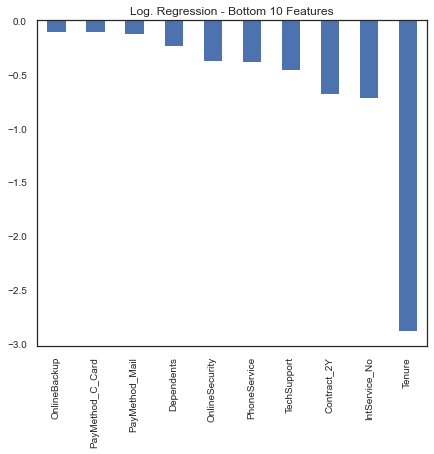

In [107]:
# Plot model evaluations.

feature_weights(X, logr, 'Log. Regression')

#### SVM

Accuracy : 0.8130 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5949 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6994 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5176 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7186                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


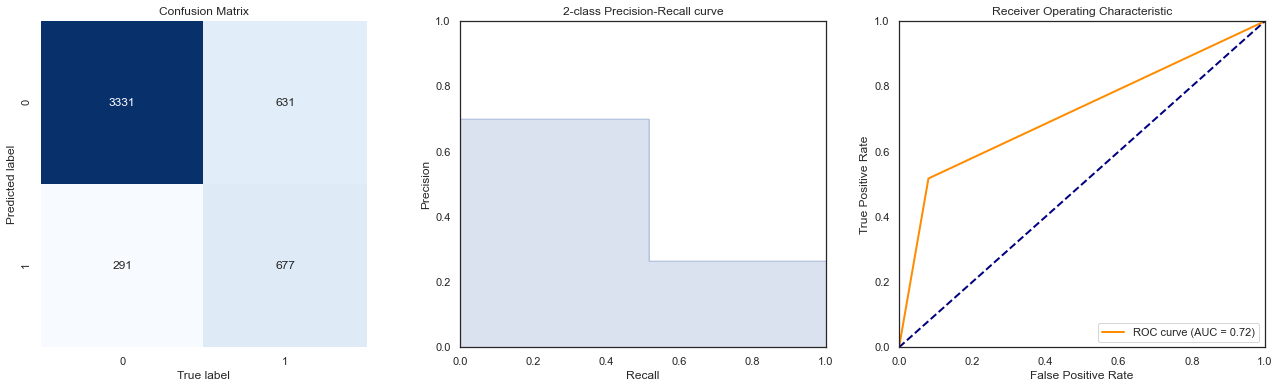

In [108]:
model = svm

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_train)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

Accuracy : 0.8003 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5720 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6635 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5027 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7053                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


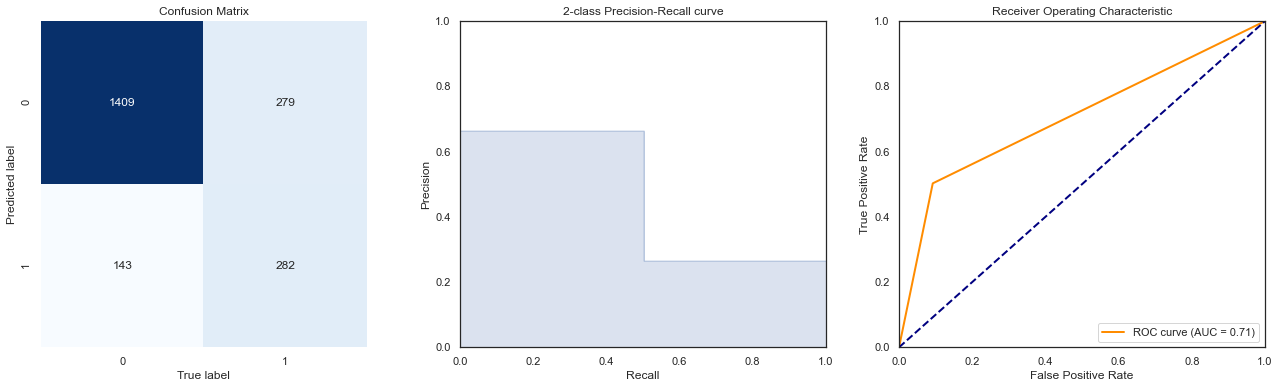

In [109]:
model = svm

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### K Nearest Neighbors

Accuracy : 0.8270 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.6589 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6907 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6300 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7640                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


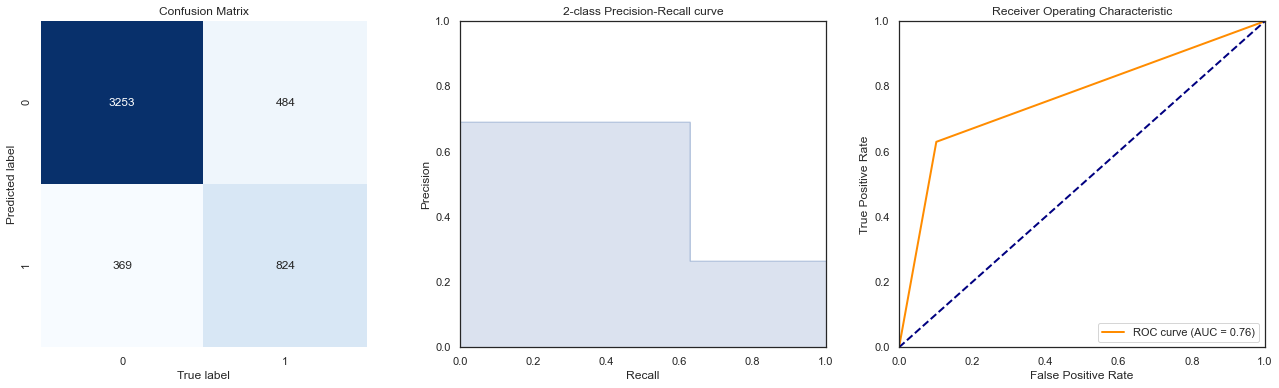

In [110]:
model = knn

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_train)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

Accuracy : 0.7653 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5312 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.5654 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5009 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6809                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


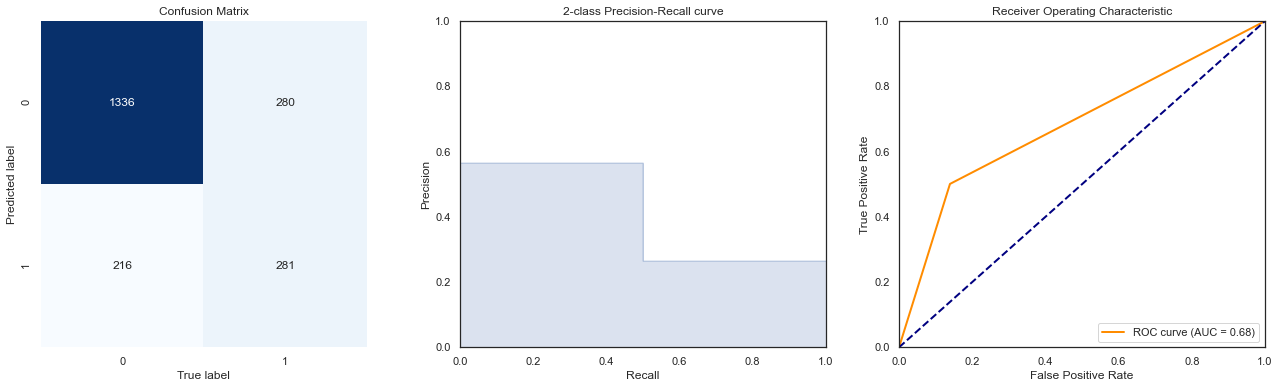

In [111]:
model = knn

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### Random Forest

Accuracy : 0.9976 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.9954 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.9947 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9962 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9971                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


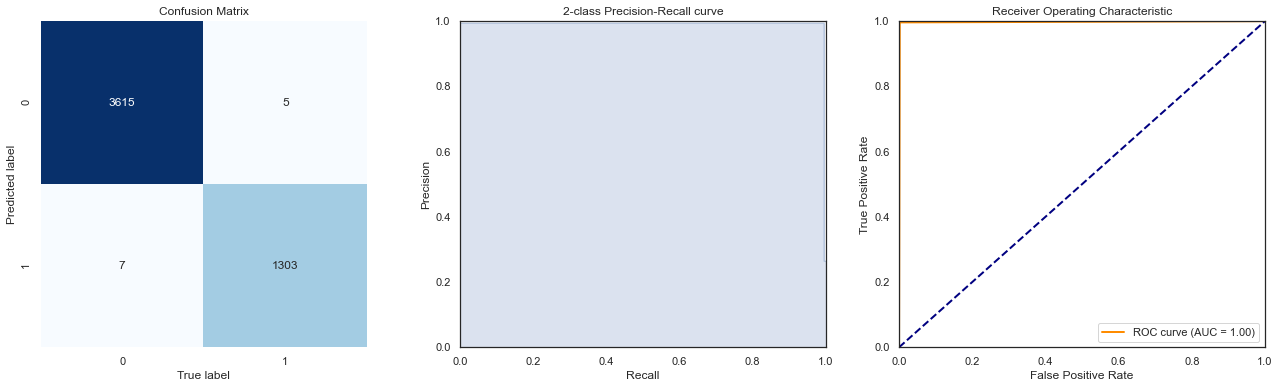

In [112]:
model = rf

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_train)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

Accuracy : 0.7856 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5484 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6222 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4902 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6913                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


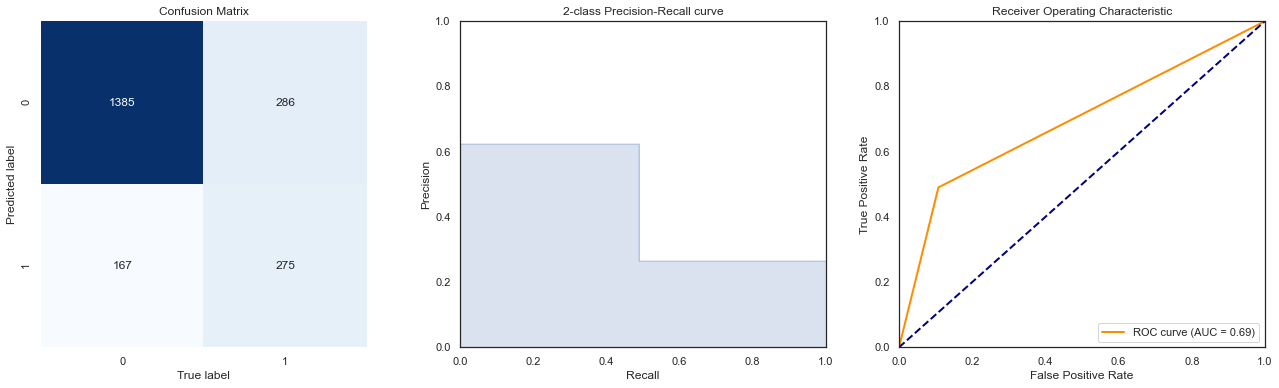

In [113]:
model = rf

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### Neural Network

In [114]:
# Print NN evaluation metrics.

nn_conf_matrix = confusion_matrix(y_test, y_pred_nn_classes_1)
print(f'Confusion Matrix:\n{nn_conf_matrix}')
print("-----------------------------------------")

nn_accuracy = accuracy_score(y_test, y_pred_nn_classes_1)
print('Accuracy: %f' % nn_accuracy)

nn_auc = roc_auc_score(y_test, y_pred_nn_prob_1)
print('ROC AUC: %f' % nn_auc)
print("-----------------------------------------")

nn_precision = precision_score(y_test, y_pred_nn_classes_1)
print('Precision: %f' % nn_precision)

nn_recall = recall_score(y_test, y_pred_nn_classes_1)
print('Recall: %f' % nn_recall)

nn_f1 = f1_score(y_test, y_pred_nn_classes_1)
print('F1 score: %f' % nn_f1)

Confusion Matrix:
[[1412  140]
 [ 255  306]]
-----------------------------------------
Accuracy: 0.813062
ROC AUC: 0.851623
-----------------------------------------
Precision: 0.686099
Recall: 0.545455
F1 score: 0.607746


## 8) Model Optimization

###  Grid Search CV Hyperparameter tunning

#### Logistic Regression

In [115]:
# Define parameter grid for GridSearch and instanciate and train model.

param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logr_tuned = LogisticRegression(solver='saga', max_iter=1000)   
logr_tuned_gs = GridSearchCV(logr_tuned, param_grid_L1, cv=5)
logr_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_logr_tuned = logr_tuned_gs.predict(X_test)
y_pred_logr_tuned_prob = logr_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logr_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': 0.1, 'penalty': 'l1'}


Accuracy : 0.8083 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5921 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6806 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5241 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7176                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


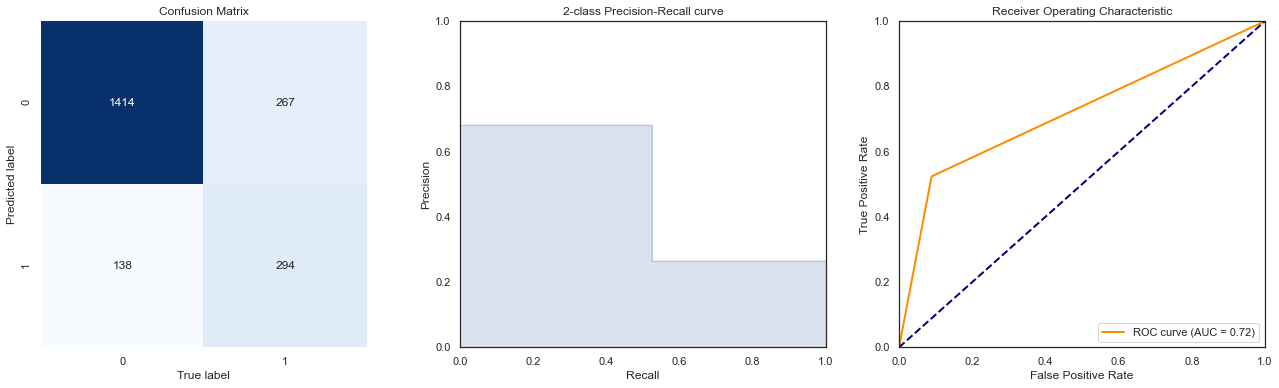

In [116]:
model = logr_tuned_gs

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### SVM

In [117]:
# Define parameter grid for GridSearch and instanciate and train model.

param_grid_svm = {'C': np.arange(.1, 3, .1)}
svm = SVC(kernel='linear', probability=True) 
svm_tuned_gs = GridSearchCV(svm, param_grid_svm, cv=5)
svm_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_svm_tuned = svm_tuned_gs.predict(X_test)
y_pred_svm_tuned_prob = svm_tuned_gs.predict_proba(X_test)

print('SVM best C value', svm_tuned_gs.best_params_, '\n')

SVM best C value {'C': 0.1} 



Accuracy : 0.8003 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5927 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6463 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5472 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7195                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


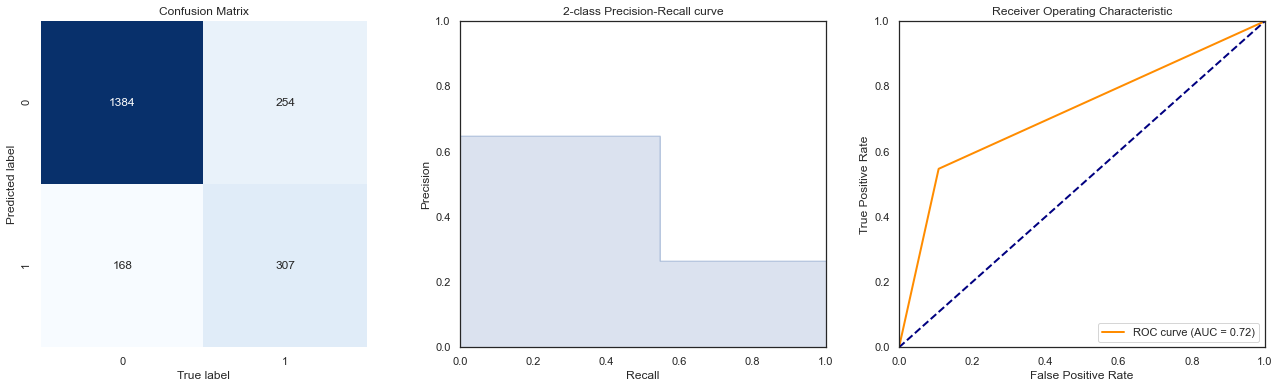

In [118]:
model = svm_tuned_gs

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### KNN

In [119]:
# Define parameter grid for GridSearch and instanciate and train model.

param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, param_grid, cv=5)
knn_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_knn_tuned = knn_gs.predict(X_test)
y_pred_knn_tuned_prob = knn_gs.predict_proba(X_test)

print('KNN best number of neighbors:', knn_gs.best_params_, '\n')

KNN best number of neighbors: {'n_neighbors': 26} 



Accuracy : 0.7932 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5834 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6270 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5455 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7141                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


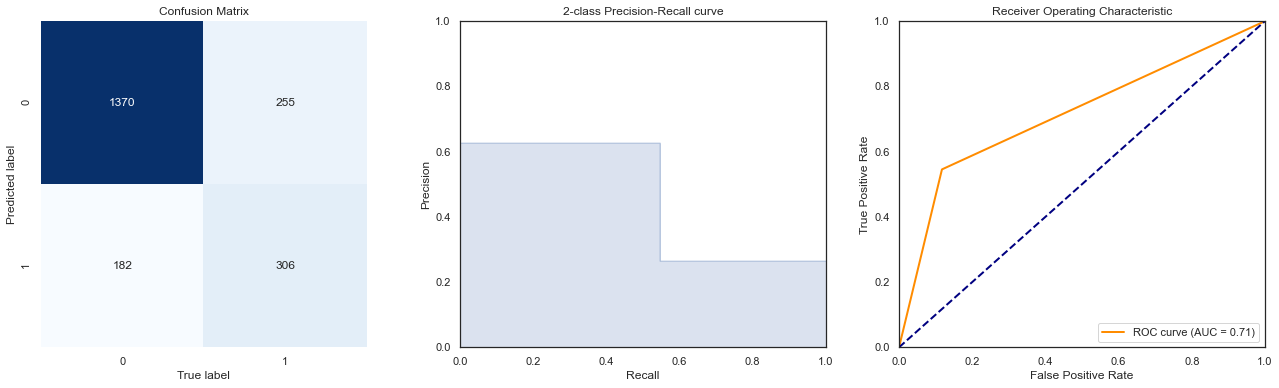

In [120]:
model = knn_gs

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### Random Forest

In [121]:
# Define parameter grid for RandomizedSearch and instanciate and train model.

param_grid_rf = {'n_estimators': np.arange(10, 2000, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_rg = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_rg.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_rf_tuned = rf_rg.predict(X_test)
y_pred_rf_tuned_prob = rf_rg.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_rg.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 170, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'gini', 'bootstrap': True}


Accuracy : 0.7927 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5655 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6376 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5080 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7018                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


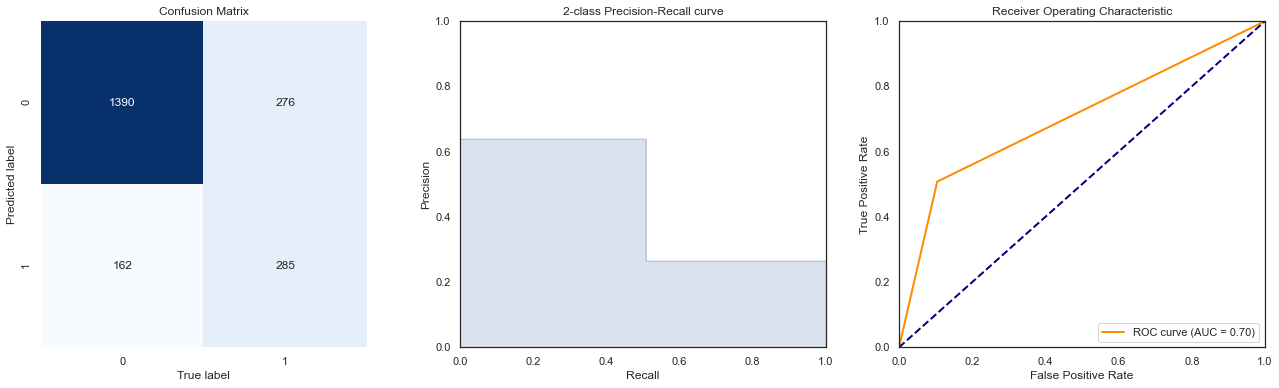

In [122]:
model = rf_rg

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

### Emsemble Method

In [123]:
# Instanciate and train the Dcision Tree model on the training set.

kfold = KFold(n_splits = 10, random_state = 7)
dtc = DecisionTreeClassifier(splitter = 'random', max_depth = 1) 
# cart = DecisionTreeClassifier(max_depth = 1) 
dtc.fit(X_train, y_train)
results = cross_val_score(dtc, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.7347


In [124]:
# Instanciate and train the Boosting model on the training set.

seed = 7
num_trees = 35
kfold = KFold(n_splits = 10, random_state = seed)
# model = AdaBoostClassifier(base_estimator = cart, n_estimators = num_trees, learning_rate = 0.7, random_state = seed)
Ada = AdaBoostClassifier(base_estimator = dtc, n_estimators = num_trees, learning_rate = 0.8)
# if estimator not specified, therefore default is DecisionTreeClassifier initialized with max_depth=1
Ada.fit(X_train, y_train)
results = cross_val_score(Ada, X_train, y_train, cv = kfold)
print('AdaBoost, Cross-Validation mean: %.4f' % results.mean())


AdaBoost, Cross-Validation mean: 0.7970


*****************
* Decision Tree *
*****************
Accuracy : 0.7347 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.0000 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


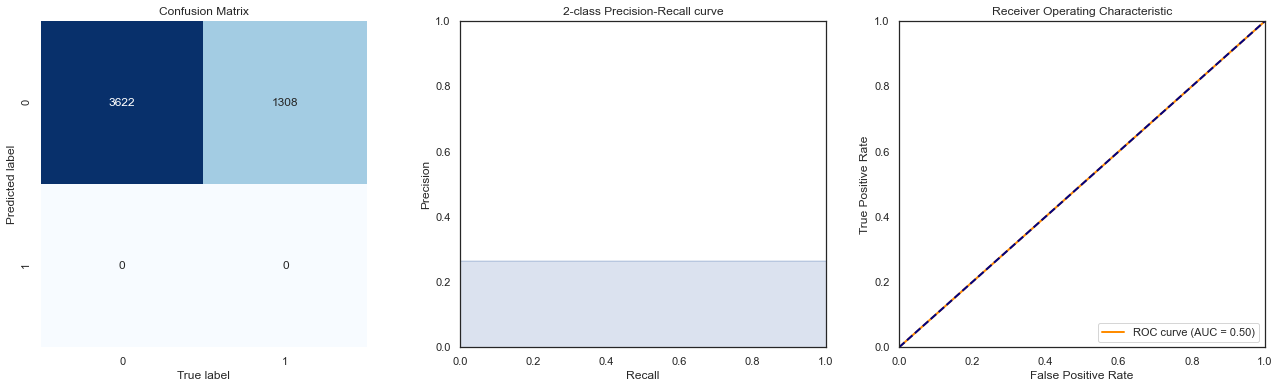


************
* AdaBoost *
************
Accuracy : 0.8041 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5896 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6635 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5306 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7167                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


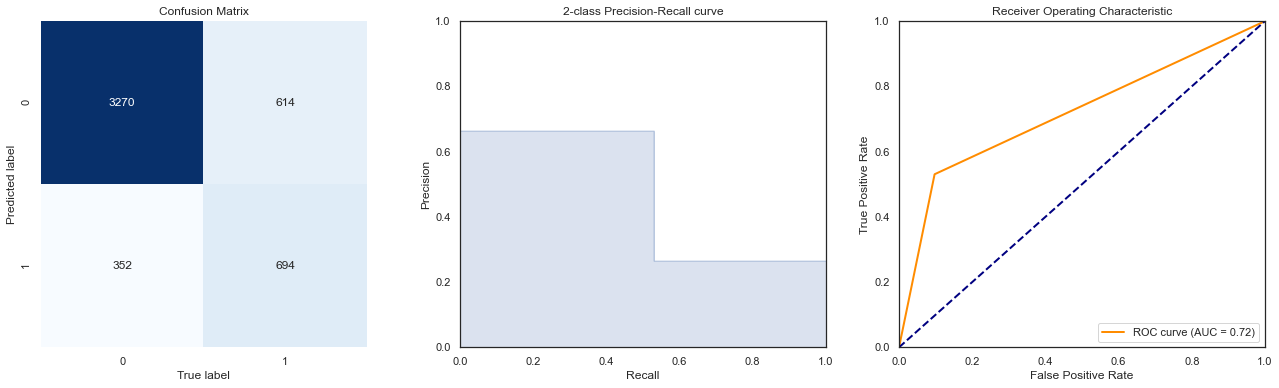

In [125]:
# Evaluate the models

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'AdaBoost']
for i, m in enumerate([dtc, Ada]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    # show the report
    accuracy_, f1_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'F1': f1_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [126]:
# Keep the results in a dataframe

results

Model  Accuracy        F1  Precision    Recall   ROC_AUC
0  Decision Tree  0.734686  0.000000    0.00000  0.000000  0.500000
1       AdaBoost  0.804057  0.589635    0.66348  0.530581  0.716699

In [127]:
# Fit into Testing Data

predictions = Ada.predict(X_test)

*****************
* Decision Tree *
*****************
Accuracy : 0.7345 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.0000 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


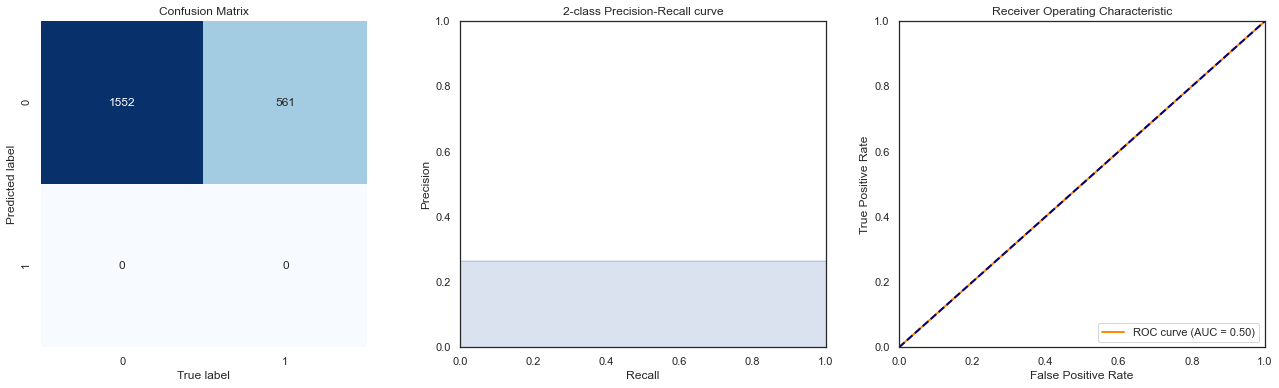


************
* AdaBoost *
************
Accuracy : 0.8154 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.6123 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6921 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5490 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7304                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


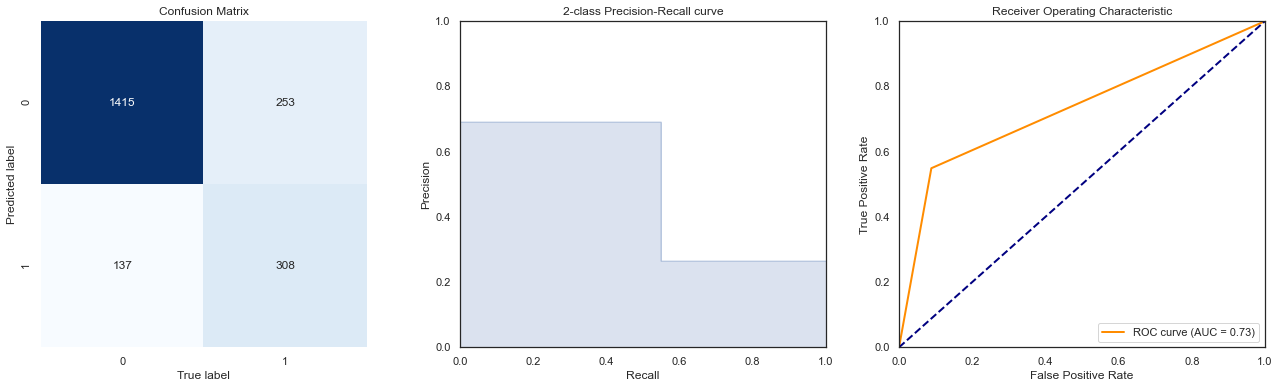

In [128]:
# Evaluate the models

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'AdaBoost']
for i, m in enumerate([dtc, Ada]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_test)
    # show the report
    accuracy_, f1_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'F1': f1_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [129]:
# Keep the results in a dataframe

results

Model  Accuracy        F1  Precision   Recall   ROC_AUC
0  Decision Tree  0.734501  0.000000   0.000000  0.00000  0.500000
1       AdaBoost  0.815428  0.612326   0.692135  0.54902  0.730373

#### Summary all models

***********************
* Logistic Regression *
***********************
Accuracy : 0.8083 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5921 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6806 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5241 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7176                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


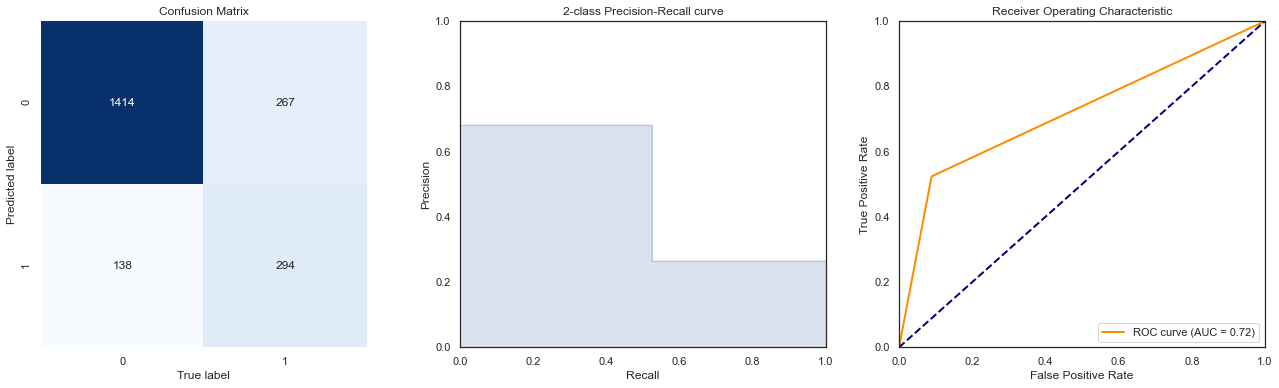


**************************
* Support Vector Machine *
**************************
Accuracy : 0.8003 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5927 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6463 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5472 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7195                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


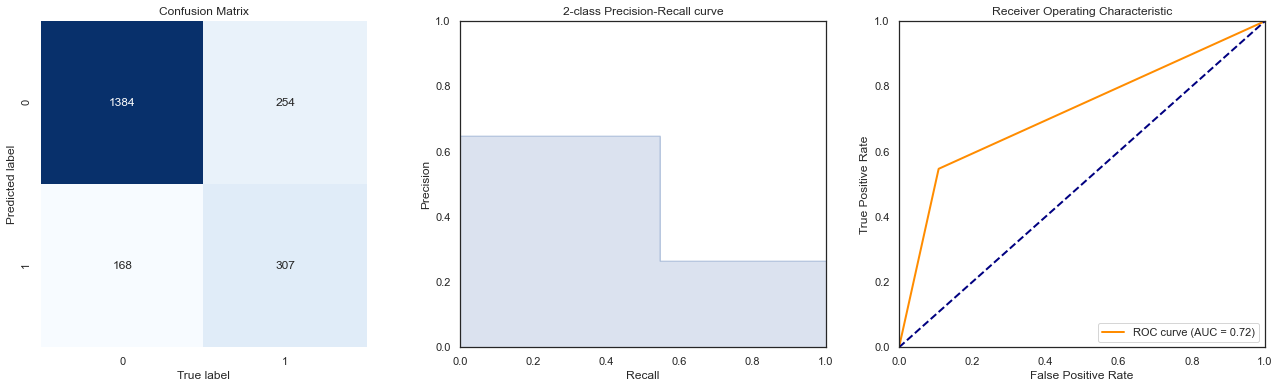


***********************
* K Nearest Neighbour *
***********************
Accuracy : 0.7932 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5834 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6270 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5455 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7141                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


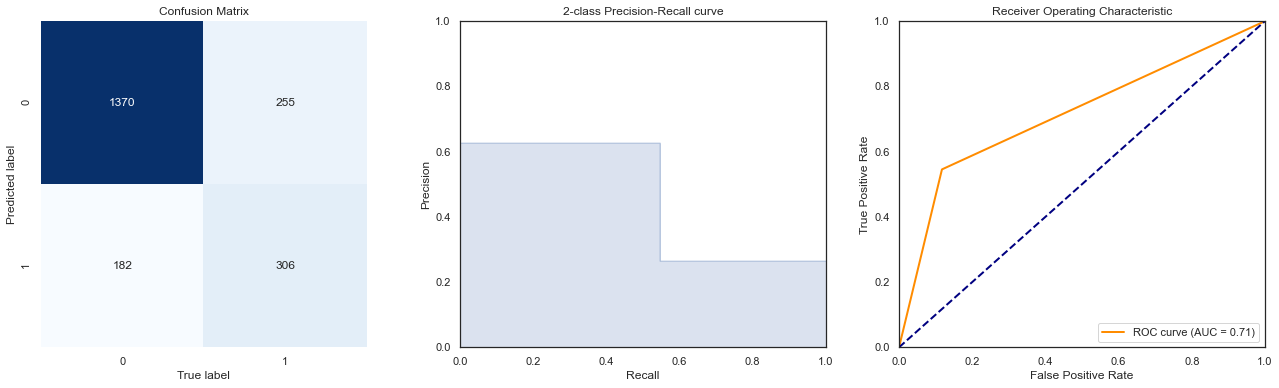


*****************
* Random Forest *
*****************
Accuracy : 0.7927 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5655 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6376 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5080 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7018                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


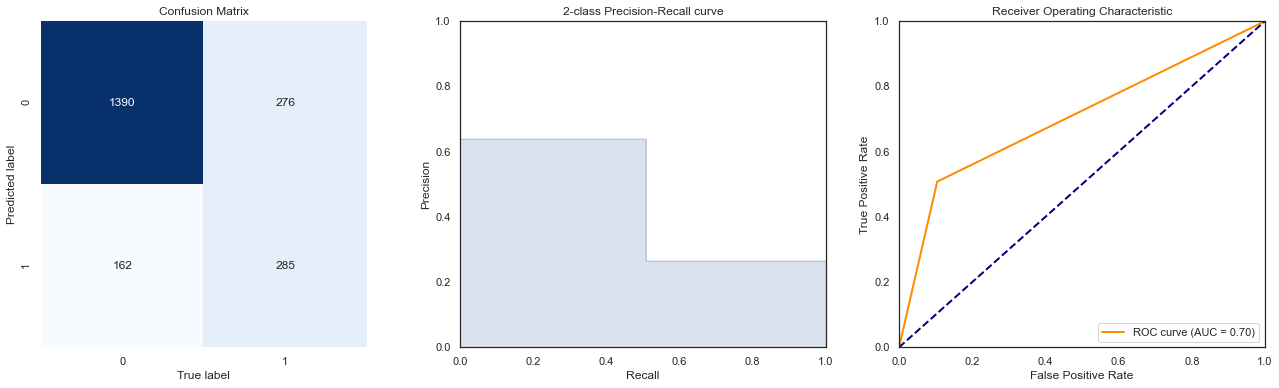


*****************
* Decision Tree *
*****************
Accuracy : 0.7345 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.0000 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


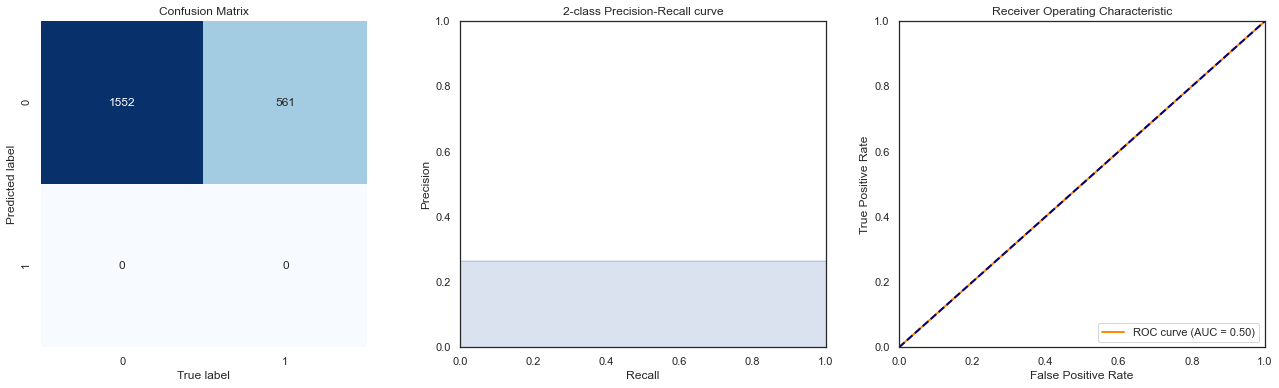


************
* AdaBoost *
************
Accuracy : 0.8154 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.6123 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6921 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5490 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7304                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


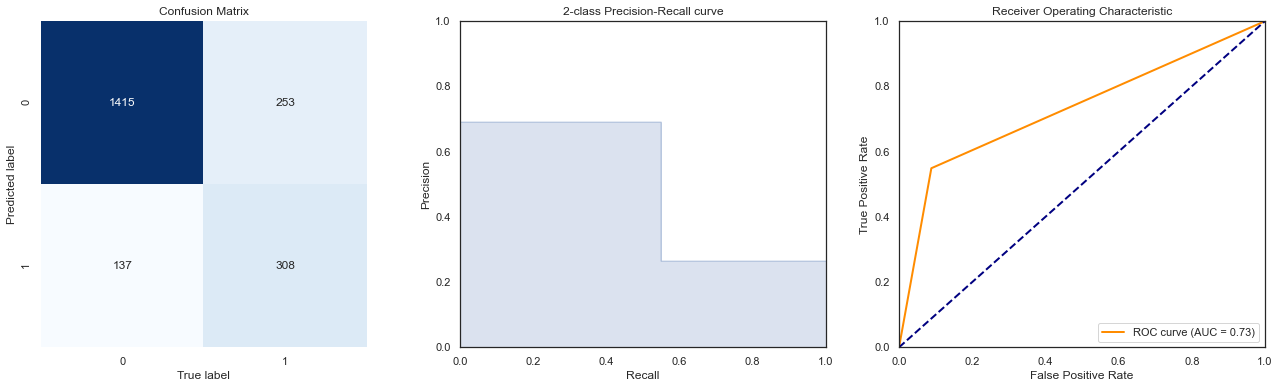

In [132]:
# Evaluate all models

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Logistic Regression','Support Vector Machine','K Nearest Neighbour','Random Forest', 'Decision Tree', 'AdaBoost']
for i, m in enumerate([logr_tuned_gs, svm_tuned_gs, knn_gs, rf_rg, dtc, Ada]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_test)
    # show the report
    accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'F1': round(f1_,4),
                      'Accuracy': round(accuracy_,4), 
                      'Precision': round(precision_,4),
                      'Recall': round(recall_,4),
                      'ROC_AUC': round(roc_auc_,4)}
    print()
    


In [133]:
# Summary all results is pandaframe 

results

Model  Accuracy      F1  Precision  Recall  ROC_AUC
0     Logistic Regression    0.8083  0.6806     0.5921  0.5241   0.7176
1  Support Vector Machine    0.8003  0.6463     0.5927  0.5472   0.7195
2     K Nearest Neighbour    0.7932  0.6270     0.5834  0.5455   0.7141
3           Random Forest    0.7927  0.6376     0.5655  0.5080   0.7018
4           Decision Tree    0.7345  0.0000     0.0000  0.0000   0.5000
5                AdaBoost    0.8154  0.6921     0.6123  0.5490   0.7304

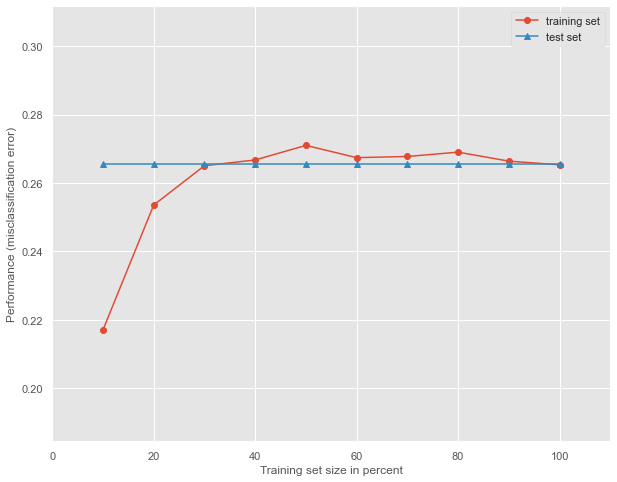

In [134]:
# Evalaute using learning curve

boosting = AdaBoostClassifier(n_estimators = num_trees, learning_rate = 0.01, random_state = seed)
        
plt.figure(figsize=(10, 8))
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model = False, style = 'ggplot')
plt.show()

### Summary

Best Performance Model for testing data : Ada Boosting

## 9) Model Deployment

In [141]:
#Saving best model 

import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(Ada, filename)

['model.sav']

_____END_____